In [43]:
import pandas as pd #Biblioteca responsavel pela manipulação dos dados
import numpy as np #Biblioteca pra trabalhar com Array e Matriz
import seaborn as sns #Biblioteca de Plot
import matplotlib.pyplot as plt #Tambem uma biblioteca de plot(Trabalha em conjunto com seaborn)

#Vamos vendo com o tempo o que sera usado e descartado, como exemplo vamos deixar esses 3 como principais pra teste de acuracia.
from sklearn.ensemble import RandomForestClassifier #Modelo de Machine Learning - TESTE 1
from sklearn.linear_model import LinearRegression, LogisticRegression #Modelo de Machine Learning - TESTE 2
from sklearn.naive_bayes import MultinomialNB #use to predict

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score #Anda em conjunto com o ML, 3 tipos de métricas para aprendizagem da maquina e testes
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer

#modelo de seleção
from sklearn.model_selection import train_test_split #Modelo de Machine Learning - TESTE 3

from nltk.tokenize import RegexpTokenizer #split words frin text
from nltk.stem.snowball import SnowballStemmer #stemmes words
from sklearn.feature_extraction.text import CountVectorizer #create sparse matrix of words usind regexp

from sklearn.tree import export_graphviz
import graphviz

from collections import Counter

In [3]:
df = pd.read_csv('malicious_phish.csv') #Coletando o primeiro dataset

In [4]:
df.fillna(df.mode().iloc[0], inplace=True) #substituir os campos nulos por zero
print(df.info()) #conteudo do dataset 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB
None


In [5]:
df.head(10)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
8,http://www.pashminaonline.com/pure-pashminas,defacement
9,allmusic.com/album/crazy-from-the-heat-r16990,benign


In [6]:
df.isnull().sum() #mostra os valores nulos no dataset 1

url     0
type    0
dtype: int64

In [7]:
df.describe() #Conteudo do dataset 1: 641.191 dados e 4 tipos de classificação

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,180,428103


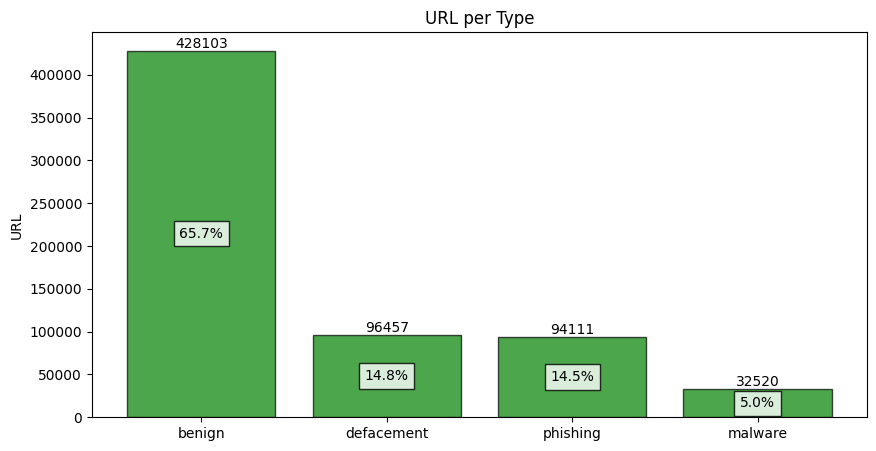

Colunas do dataframe DF Index(['url', 'type'], dtype='object'), 
Valores para ML: type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64, 
Conteúdo: RangeIndex(start=0, stop=651191, step=1)



In [10]:
types = df['type'].values

counter_types = Counter(types)

type_names = list(counter_types.keys())
type_values = list(counter_types.values())

sorted_indices = np.argsort(type_values)[::-1]
type_names = [type_names[i] for i in sorted_indices]
type_values = [type_values[i] for i in sorted_indices]

total_count = sum(type_values)
percentages = [value / total_count * 100 for value in type_values]

pattern = ''

y_pos = np.arange(len(type_names))
plt.figure(1, figsize=(10, 5))
bars = plt.bar(y_pos, type_values, align='center', alpha=0.7, color='green', edgecolor='black', hatch=pattern)

for bar, value, percentage in zip(bars, type_values, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{value}', ha='center', va='bottom')
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{percentage:.1f}%', ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

plt.xticks(y_pos, type_names)
plt.ylabel('URL')
plt.title('URL per Type')
plt.show()

print(f"Colunas do dataframe DF {df.columns}, \nValores para ML: {df['type'].value_counts()}, \nConteúdo: {df.index}\n" )

In [11]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')  #O Tokenizer "corta" uma string usando expressões regulares, cada match que corresponde aos tokens ou aos separadores entre os tokens.

In [12]:
print(df.url[2])

tokenizer.tokenize(df.url[2])

bopsecrets.org/rexroth/cr/1.htm


['bopsecrets', 'org', 'rexroth', 'cr', 'htm']

In [13]:
df['text_tokenized'] = df.url.map(lambda t: tokenizer.tokenize(t))

In [14]:
df.sample(5)

,url,type,text_tokenized
421164,facebook.com/people/Alberto-Vargas/502217863,benign,"[facebook, com, people, Alberto, Vargas]"
1758,http://us.battle.net.d3.loginwowow.com/login/en/,phishing,"[http, us, battle, net, d, loginwowow, com, lo..."
488355,leduccurling.com/default.aspx?p=curlingclinics,benign,"[leduccurling, com, default, aspx, p, curlingc..."
398705,http://www.briard-profi.de/component/rsgallery...,defacement,"[http, www, briard, profi, de, component, rsga..."
360254,http://yourlust.com/videos/cute-brunette-gives...,benign,"[http, yourlust, com, videos, cute, brunette, ..."


In [15]:
stemmer = SnowballStemmer("english")

In [16]:
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])

In [17]:
df.sample(10)

,url,type,text_tokenized,text_stemmed
629321,portal.acm.org/citation.cfm?id=317908&amp;coll...,phishing,"[portal, acm, org, citation, cfm, id, amp, col...","[portal, acm, org, citat, cfm, id, amp, coll, ..."
467615,webivox.club,phishing,"[webivox, club]","[webivox, club]"
528850,http://jivecomunicacoes.com.br/webbs/source,phishing,"[http, jivecomunicacoes, com, br, webbs, source]","[http, jivecomunicaco, com, br, webb, sourc]"
619512,www.sea-priestess.com/ecards-e.htm,phishing,"[www, sea, priestess, com, ecards, e, htm]","[www, sea, priestess, com, ecard, e, htm]"
89267,youtube.com/watch?v=p78dYHVjgnM,benign,"[youtube, com, watch, v, p, dYHVjgnM]","[youtub, com, watch, v, p, dyhvjgnm]"
502271,kansasboguslegislature.org/biblio/index.html,benign,"[kansasboguslegislature, org, biblio, index, h...","[kansasboguslegislatur, org, biblio, index, html]"
113263,en.wikipedia.org/wiki/Singularity_(album),benign,"[en, wikipedia, org, wiki, Singularity, album]","[en, wikipedia, org, wiki, singular, album]"
248487,joelfrancis.com/2010/01/08/elvis-at-kemper/,benign,"[joelfrancis, com, elvis, at, kemper]","[joelfranc, com, elvi, at, kemper]"
176474,uk.linkedin.com/pub/julie-andre/17/2b4/17a,benign,"[uk, linkedin, com, pub, julie, andre, b, a]","[uk, linkedin, com, pub, juli, andr, b, a]"
600441,www626.paypal.co.uk.46550.ssl-120.mx/js/webapp...,benign,"[www, paypal, co, uk, ssl, mx, js, webapps, uk...","[www, paypal, co, uk, ssl, mx, js, webapp, uk,..."


In [18]:
df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))

In [19]:
df.sample(5)

,url,type,text_tokenized,text_stemmed,text_sent
29611,naturalplane.blogspot.com/2010/08/mothman-come...,benign,"[naturalplane, blogspot, com, mothman, cometh,...","[naturalplan, blogspot, com, mothman, cometh, ...",naturalplan blogspot com mothman cometh john k...
24632,akhilbhartiyejainmahasabha.in,phishing,"[akhilbhartiyejainmahasabha, in]","[akhilbhartiyejainmahasabha, in]",akhilbhartiyejainmahasabha in
377910,tfwiki.net/wiki/Shockwave_%28disambiguation%29,benign,"[tfwiki, net, wiki, Shockwave, disambiguation]","[tfwiki, net, wiki, shockwav, disambigu]",tfwiki net wiki shockwav disambigu
406248,http://elitedaily.com/news/technology/netherla...,benign,"[http, elitedaily, com, news, technology, neth...","[http, elitedaili, com, news, technolog, nethe...",http elitedaili com news technolog netherland ...
247127,http://9779.info/%E5%87%A0%E4%BD%95%E5%9B%BE%E...,malware,"[http, info, E, A, E, BD, E, B, BE, E, BD, A, ...","[http, info, e, a, e, bd, e, b, be, e, bd, a, ...",http info e a e bd e b be e bd a e b bc e b b ...


In [20]:
CountVectorize = CountVectorizer()

In [21]:
feat = CountVectorize.fit_transform(df.text_sent) #transforma todo o texto que foi stemado e tokenizado

In [22]:
feat[:5].toarray() #convertendo uma matriz sparse para um array para imprimir a variavel feat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
trainX, testX, trainY, testY = train_test_split(feat, df.type)

In [24]:
#LOGISTIC REGRESSION
lr = LogisticRegression()

lr.fit(trainX,trainY)

c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
lr.score(testX,testY)

0.9519220137839531

[Text(0, 0.5, 'benign'),
 Text(0, 1.5, 'defacement'),
 Text(0, 2.5, 'malware'),
 Text(0, 3.5, 'phishing')]

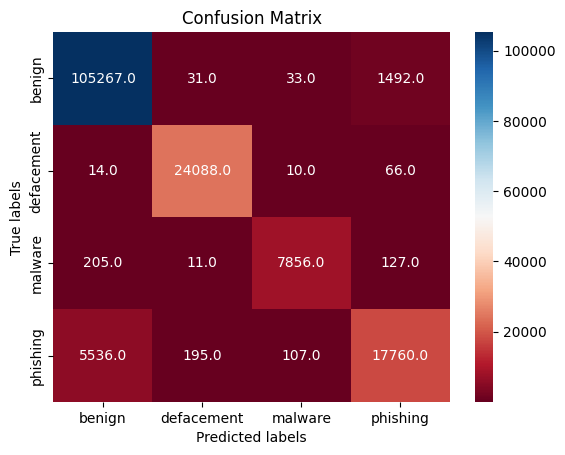

In [26]:
y_pred = lr.predict(testX)
cols = list(lr.classes_)
ax = plt.subplot()
CM_LR = confusion_matrix(testY,y_pred) 
#sns.heatmap(CM_LR, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(CM_LR, annot=True, fmt = ".1f",cmap="RdBu")
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(cols)
ax.yaxis.set_ticklabels(cols)

In [50]:
from sklearn.preprocessing import OneHotEncoder

# Supondo que 'trainY' seja um DataFrame ou Series
one_hot_encoder = OneHotEncoder()
trainY_encoded = one_hot_encoder.fit_transform(trainY.values.reshape(-1,1)).toarray()

In [51]:
reg = LinearRegression()

reg.fit(trainX, trainY_encoded)


LinearRegression()

In [66]:
reg.score(trainX, trainY_encoded)



<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3863629 stored elements and shape (488393, 384255)>
  Coords	Values
  (0, 65076)	1
  (0, 350885)	1
  (0, 163187)	1
  (0, 178682)	1
  (1, 228653)	1
  (1, 146380)	1
  (1, 65143)	1
  (1, 302271)	1
  (1, 222840)	1
  (2, 65076)	1
  (2, 2326)	1
  (2, 28924)	1
  (2, 5365)	1
  (2, 194943)	1
  (2, 75134)	1
  (2, 28967)	1
  (2, 53189)	1
  (2, 49994)	1
  (3, 149154)	1
  (3, 47233)	1
  (3, 244277)	1
  (3, 363948)	1
  (3, 343520)	1
  (3, 2732)	1
  (3, 216818)	1
  :	:
  (488389, 60235)	2
  (488389, 191982)	1
  (488389, 358193)	2
  (488389, 364529)	1
  (488389, 307580)	1
  (488390, 65076)	1
  (488390, 376393)	1
  (488390, 357815)	1
  (488390, 230478)	1
  (488390, 366931)	1
  (488391, 149163)	1
  (488391, 244630)	1
  (488391, 146380)	1
  (488391, 204492)	1
  (488391, 2402)	2
  (488392, 65076)	1
  (488392, 149289)	1
  (488392, 367945)	1
  (488392, 155828)	1
  (488392, 255940)	1
  (488392, 45007)	1
  (488392, 21662)	1
  (488392, 308408)	1
  (48